> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

#  Exercise Set 1: Introduction to modeling and machine learning
In this exercise set you will get an introduction to modeling using data. We proceed with introducing machine learning, and will get your first taste of how machine learning algorithms are constructed. You will implement a [_perceptron_](https://en.wikipedia.org/wiki/Perceptron) from scratch using the matrix-algebra library NumPy. We will train this model on the iris data to predict flower types. 



# The perceptron model

The first supervised learning model we work with is an old model. We will learn about it because it simple enough to grasp how it works and we will use to build the intuition for more advanced models later in the course. 




> **Ex. 1.1.1:** The mathematics and biological reasoning which justifies the perceptron model is presented in Raschka, 2017 on pages 18 to 24. If you haven't read it already, quickly do so. 
>
> Begin by importing `numpy`, `pandas` and `seaborn`

In [1]:
# [Answer to Ex. 1.1.1]

In [2]:
# Example answer
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

> **Ex. 1.1.2:** Use the following code snippet to load the iris data. The code will create two new variablex **X** and **y**, each of which are numpy arrays. Split the data as follows. The first dataset should contain the first 70 rows; we call this sample our *training dataset*, or simply *train data*. We use the training data to estimate the data. We use the remaining rows as data for testing our model, thus we call it *test data*. 
>
>```python 
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})
plt.show()
```

In [3]:
# [Answer to Ex. 1.1.2]

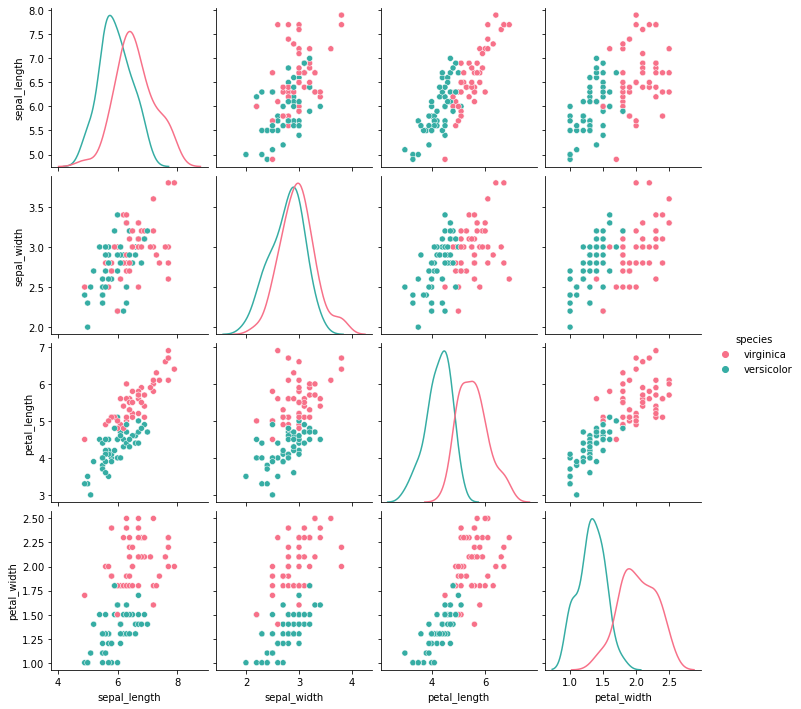

In [4]:
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})
plt.show()

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]

> **Ex. 1.1.3:** Write a function which initiate a set of weights `w` with length 1 larger than the number of features in your data. Ensure that your initial weights are not exactly 0, but close to it. 
>
>> _Hint 1:_ Use [np.random.RandomState](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) to set up a random number generator from which you can draw from a normal with mean 0 and scale 0.01. 
>
>> _Hint 2:_ Say you have stored the random number generator in an object called `rgen`. You can then call `rgen.normal(size = 1 + columns_in_X)` to get the weights you want. You might want to tweak the `scale` parameter.

In [5]:
# [Answer to Ex. 1.1.3]

In [6]:
def random_weights(location = 0.0, scale = 0.01, seed = 1, size=1 + X.shape[1]):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= size)
    
    return w

> **Ex. 1.1.4:** In this problem you need to write two functions:
> * `net_input(X, W)`: calculates _and returns_ the net-input, i.e the linear combination of features and weights, $z=w_0 + \sum_k x_{k} w_{k}$
> * `predict(X, W)`: a step function which returns 1 if the net activation is $\geq$ 0, and returns -1 otherwise. 
>
>*Bonus:* Create a function which calculates the _accuracy_ (the share of cases that are correctly classified). The function should take a vector of y-values and a vector of predicted y-values as input. What is the accuracy of your untrained model on the training data?

>> _Hint 1:_ you can compute the above using an array product. Here numpy's array product named `dot` may be useful

>> _Hint 2:_ remember to include the bias, $w_0$, in the computation!


In [7]:
# [Answer to Ex. 1.1.4]

In [8]:
def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)

# Bonus
def accuracy(y, prediction):
    return np.mean(y == prediction)

accuracy(ytrain, predict(Xtrain, random_weights()))


0.45714285714285713

> **Ex. 1.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an `int` which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus exercise (for 1.1.4), calculate the accuracy on training data using the updated weights as input in the predict function. Any progress yet?

In [9]:
# [Answer to Ex. 1.1.5]

In [10]:
# This will be in assignment 2

In [11]:
def perceptronEpoch(X, y, W, eta = 0.1):
    errors = 0
    # For each pair (x-row, y-row) in the data
    for xi, yi in zip(X, y):

        # Do the updating process described in Raschka
        update = eta * (yi - predict(xi, W))    # Notice this is 0 if target == predicted
        W[1:] = W[1:] + update * xi      # Update weights
        W[0] = W[0] + update            # Update bias

        errors += int(update != 0.0)    # keep count of the errors in this iteration
    return W, errors

w, e = perceptronEpoch(Xtrain, ytrain, random_weights())

# Bonus:
accuracy(ytrain, predict(Xtrain, w))

0.45714285714285713

> **Ex. 1.1.6:** Write a function, which repeats the updating procedure (calls the function) you constructed in 1.1.5 for `n_iter` times by packing the whole thing in a loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```


In [12]:
# [Answer to Ex. 1.1.6]

In [13]:
# This will be in assignment 2

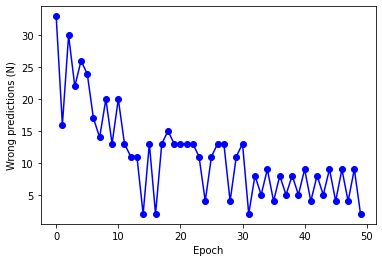

In [14]:
def Perceptron(X, y, n_iter = 50, eta = 0.1):    
    # Reset weights. 
    w = random_weights()
    error_sequence = []
    # each step in the iteration procedure
    for _ in range(n_iter):
        w, e = perceptronEpoch(X, y, w, eta)
        error_sequence.append(e)
    
    # w is what characterizes the trained network. The errors are just for show.
    return w, error_sequence
    

trained_w, errorseq = Perceptron(Xtrain, ytrain)
    
plt.plot(range(50), errorseq, 'b-o')
plt.xlabel("Epoch")
plt.ylabel("Wrong predictions (N)")
plt.show()

> **Ex. 1.1.7 (BONUS):** Use the updated weights when predicting and calculate the accuracy of your perceptron on the test data?  

In [15]:
# [Answer to Ex. 1.1.7 BONUS] 

In [16]:
pred = predict(Xtest, trained_w)
accuracy(ytest, pred)

0.6666666666666666

> **Ex.1.1.8 (BONUS):** Restructure your code as a class called `Perceptron` with `.fit()` and `.predict()` methods (you) will probably need more helper methods. Store hyperparameters as eta and the number of iterations as class attributes.

In [17]:
# [Answer to Ex. 1.1.8 BONUS] 

In [18]:
class Perceptron:
    """ Implements the simple perceptron algo
    """

    def __init__(self, X, y, eta = 0.1, n_iter = 50, seed = 1):
        """ Populate instance with relevant parameters and data
        """
        self.n_iter = n_iter
        self.eta = eta      
        self.seed = seed         
        
        self._errseq = []
        self._shape = X.shape[1]
        self._w = self._random_weights()

        self.X = X
        self.y = y

    def _random_weights(self, loc = 0.0, scale = 0.01):
        """ Initiates weights as random and close to 0
        """
        # Init random number generator
        rgen = np.random.RandomState(self.seed)
        w = rgen.normal(loc=loc, scale=scale, size= 1 + self._shape)

        return w
    
    def _net_activation(self, X):
        """ Calculate X'w
        """
        return np.dot(X, self._w[1:]) + self._w[0]   # Linear product W'X
    
    def accuracy(self, prediction):
        """ Assess accuracy
        """
        return np.mean(self.y == prediction)   
 
    def predict(self, X = None):
        """ Create predictions from trained (/untrained) classifier
        """
        if X is None:
            X = self.X        
        linProd = self._net_activation(X)
        return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)

    def _perceptronEpoch(self):
        """ One epoch of the perceptron algo
        """
        errors = 0
        # For each pair (x-row, y-row) in the data
        for xi, yi in zip(self.X, self.y):

            # Do the updating process described in Raschka
            update = self.eta * (yi - self.predict(xi))    # Notice this is 0 if target == predicted
            self._w[1:] = self._w[1:] + update * xi      # Update weights
            self._w[0] = self._w[0] + update            # Update bias

            errors += int(update != 0.0)    # keep count of the errors in this iteration
        self._errseq.append(errors)

        return self

    def fit(self):
        """ Fit the perceptron 
        """
        for _ in range(self.n_iter):
            
            self._perceptronEpoch()
            
        return self
        

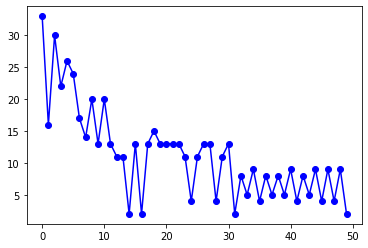

In [19]:
p = Perceptron(X = Xtrain, y= ytrain).fit()
plt.plot(p._errseq, 'b-o') 

# Beyond the perceptron model

Having seen and worked with the perceptron I want to provide you with some ideas on how we can change parts of the perceptron to obtain another model. Again, you may want to familiarize yourself with background concepts: [gradient](https://en.wikipedia.org/wiki/Gradient), [sum of squared errors](https://en.wikipedia.org/wiki/Residual_sum_of_squares) and the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function).

## Logistic regression 

Logistic regression is another simple linear machine-learning algorithm, you can read about it [here:](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)


> **Ex. 1.2.1:** Import the LogisticRegression classifier from `sklearn.linear_model`. Create a new object called `clf` like:
```
clf = LogisticRegression()
```
All scikit learn models have two fundamental methods `.fit()` and `.predict()`. Fit your model to the training data, and store the fitted model in a new object. Import _accuracy_score_ from `sklearn.metrics` and asses the accuracy of the LogisticRegression on both your training data and your test data.

In [20]:
# [Answer to Ex. 1.2.1]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs')
fitted_model = clf.fit(Xtrain, ytrain)

train_score = accuracy_score(ytrain, fitted_model.predict(Xtrain))
test_score = accuracy_score(ytest, fitted_model.predict(Xtest))

print(f"On the training data we get a score of {round(train_score, 2)}, while the score on the test data is {round(test_score, 2)}")

On the training data we get a score of 0.96, while the score on the test data is 0.97


# Linear regression mechanics
### Implementing and evaluating the gradient decent 
 
Normally we use OLS to estimate linear regression models, but this is only way of solving the problem of minimizing the least squares problem (that minimizes the sum of squared errors). 

You may find PML pp. 310-312, 319-324 useful as background reading.

We continue straight to an exercise where you are to implement a new estimator that we code up from scratch. We solve the numerical optimization using the gradient decent algorithm. Using our algorithm we will fit it to some data, and compare our own solution to the standard solution from `sklearn`

> **Ex. 11.1.0**: Import the dataset `tips` from the `seaborn`.


*Hint*: use the `load_dataset` method in seaborn

In [22]:
# [Answer to Ex. 11.1.0]

In [23]:
# Load the example tips dataset

tips = sns.load_dataset("tips")

> **Ex. 11.1.1**: Convert non-numeric variables to dummy variables for each category (remember to leave one column out for each catagorical variable, so you have a reference). Restructure the data so we get a dataset `y` containing the variable tip, and a dataset `X` containing the 
features. 

>> *Hint*: You might want to use the `get_dummies` method in pandas, with the `drop_first = True` parameter. 

In [24]:
# [Answer to Ex. 11.1.1]

In [25]:
tips_num = pd.get_dummies(tips, drop_first=True)

X = tips_num.drop('tip', axis = 1)
y = tips_num['tip']

> **Ex. 11.1.2**: Divide the features and target into test and train data. Make the split 50 pct. of each. The split data should be called `X_train`, `X_test`, `y_train`, `y_test`.

>> *Hint*: You may use `train_test_split` in `sklearn.model_selection`.

In [26]:
# [Answer to Ex. 11.1.2]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5)

> **Ex. 11.1.3**: Normalize your features by converting to zero mean and one std. deviation.

>> *Hint 1*: Take a look at `StandardScaler` in `sklearn.preprocessing`. 

>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [28]:
# [Answer to Ex. 11.1.3]

In [29]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
norm_scaler = StandardScaler().fit(X_train) 
X_train = norm_scaler.transform(X_train) 
X_test = norm_scaler.transform(X_test) 

> **Ex. 11.1.4**: Make a function called `compute_error` to compute the prediction errors given input target `y_`, input features `X_` and input weights `w_`. You should use matrix multiplication.
>
>> *Hint 1:* You can use the net-input fct. from yesterday.
>>
>> *Hint 2:* If you run the following code,
>> ```python
y__ = np.array([1,1])
X__ = np.array([[1,0],[0,1]])
w__ = np.array([0,1,1])
compute_error(y__, X__, w__)
```

>> then you should get output:
```python 
array([0,0])
```



In [30]:
# [Answer to Ex. 11.1.4]

In [31]:
def net_input(X_, w_):    
    ''' Computes the matrix product between X and w. Note that
    X is assumed not to contain a bias/intercept column.'''
    return np.dot(X_, w_[1:]) + w_[0]   # We have to add w_[0] separately because this is the constant term. We could also have added a constant term (columns of 1's to X_ and multipliced it to all of w_)

def compute_error(y_, X_, w_):
    return y_ - net_input(X_, w_)

> **Ex. 11.1.5**: Make a function to update the weights given input target `y_`, input features `X_` and input weights `w_` as well as learning rate, $\eta$, i.e. greek `eta`. You should use matrix multiplication.

In [32]:
# [Answer to Ex. 11.1.5]

In [33]:
def update_weight(y_, X_, w_, eta):
    error = compute_error(y_, X_, w_)    
    w_[1:] += eta * (X_.T.dot(error))
    w_[0] += eta * (error).sum()   
    print((error**2).sum()/2)

> **Ex. 11.1.6**: Use the code below to initialize weights `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1+X.shape[1])
```

In [34]:
# [Answer to Ex. 11.1.6]

In [35]:
10**-3

0.001

In [36]:
w = np.zeros(1+X.shape[1])
error_train, error_test = [], []
for i in range(50):
    update_weight(y_train, X_train, w, 10**-3)

663.3838000000001
519.4694717377356
410.92521173317425
328.6732956782054
266.11116088752425
218.38328391622932
181.88569643882568
153.92286781066133
132.46614795815856
115.98112551360207
103.30257716299492
93.54283431203241
86.02397638134525
80.22724598465945
75.7550604860321
72.30232990123545
69.63470824190767
67.57204599783037
65.9757659829919
64.73921187535204
63.780257117413356
63.03563735384641
62.45659997826392
62.00556195112962
61.65354052386691
61.37817708550569
61.16221655532062
60.992336893145506
60.858247844272455
60.7519968115199
60.66743413071216
60.59980105774671
60.545412244498806
60.50141098718199
60.46558053222173
60.43619857110162
60.41192501486686
60.391715416346194
60.374754161233255
60.36040289893528
60.34816072352456
60.33763341568846
60.32850967324347
60.32054273285212
60.313536151611544
60.307332799224255
60.30180632880794
60.29685456190638
60.29239435237004
60.288357593291984


> **Ex. 11.1.7**: Make a function to compute the mean squared error. Alter the loop so it makes 100 iterations and computes the MSE for test and train after each iteration, plot these in one figure. 

>> Hint: You can use the following code to check that your model works:
>>```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)
```

In [37]:
# [Answer to Ex. 11.1.7]

In [38]:
def MSE(y_, X_, w_):
    error_squared = compute_error(y_, X_, w_)**2
    return error_squared.sum() / len(y_)

w = np.zeros(X.shape[1]+1)

MSE_train = [MSE(y_train, X_train, w)]
MSE_test = [MSE(y_test, X_test, w)]

for i in range(100):
    update_weight(y_train, X_train, w, 10**-3)
    
    MSE_train.append(MSE(y_train, X_train, w))
    MSE_test.append(MSE(y_test, X_test, w))    


663.3838000000001
519.4694717377356
410.92521173317425
328.6732956782054
266.11116088752425
218.38328391622932
181.88569643882568
153.92286781066133
132.46614795815856
115.98112551360207
103.30257716299492
93.54283431203241
86.02397638134525
80.22724598465945
75.7550604860321
72.30232990123545
69.63470824190767
67.57204599783037
65.9757659829919
64.73921187535204
63.780257117413356
63.03563735384641
62.45659997826392
62.00556195112962
61.65354052386691
61.37817708550569
61.16221655532062
60.992336893145506
60.858247844272455
60.7519968115199
60.66743413071216
60.59980105774671
60.545412244498806
60.50141098718199
60.46558053222173
60.43619857110162
60.41192501486686
60.391715416346194
60.374754161233255
60.36040289893528
60.34816072352456
60.33763341568846
60.32850967324347
60.32054273285212
60.313536151611544
60.307332799224255
60.30180632880794
60.29685456190638
60.29239435237004
60.288357593291984
60.284688107903825
60.28133922448362
60.27827188093437
60.27545313986131
60.2728550221

<AxesSubplot:>

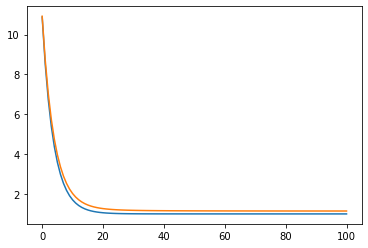

In [39]:
pd.Series(MSE_train).plot()
pd.Series(MSE_test).plot()

The following bonus exercises are for those who have completed all other exercises until now and have a deep motivation for learning more.

> **Ex. 11.1.8 (BONUS)**: Implement your linear regression model as a class.

> ANSWER: A solution is found on p. 320 in Python for Machine Learning.

## AdaLine (BONUS)
AdaLine is a modified version of the perceptron. The only difference lies in the way the two models learn from their training data, i.e. the optimization method used. The perceptron used the binary classifications for learning, while AdaLine only applies the binary threshold after training, and thus uses real valued numbers when learning. 
>> _Hint:_ Most of the code for this exercise can be written by copying and modifying code from exercise 1.1.

> **Ex. 1.3.1 (BONUS):** Implement two functions described below. You shold reuse your `net_input` from Ex. 1.1.4.:
* `ada_activation_function`: the identify function $ada\_activation(z) = z$
* `ada_predict`: A step function   $ada\_predict(z) = 1 \ if \ z \geq 0  \ else \ 0$ where z is the output of _the activation function_.



> The following figure might help you understand how each of these functions relate to the algorithm, and how the perceptron and adaline differ:
![asd](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

In [40]:
# [Answer to Ex. 1.3.1 BONUS]

In [41]:
def ada_activation(Z):
    return Z
    
def ada_predict(X, W):
    linProd = net_input(X, W)
    act = ada_activation(linprod)
    return np.where(act >= 0.0, 1, -1)    # 1(linProd > 0)


> **Ex. 1.3.2 (BONUS):** AdaLine uses a _cost function_ to quantize the accuracy of the classifier this is given by 
>$$ 
cost(X,y,W) = \frac{1}{2} \sum_{i=1}^N (y_i - activation(z_i) )^2 , \qquad z_i = net\_input(x_i, W)
$$
> If you've followed any normal undergraduate courses in statistics you should recognize this function. Begin by implementing the cost function. Unlike in undergraduate statistics we will optimize our estimator using gradient descent, therefore **code up the negative of the derivative of the cost function as well**. 
> $$ 
-cost'_j(X,y, W) = -\sum_{i=1}^N (y_i - activation(z_i)) x_i^j,  \qquad z_i = net\_input(x_i, W)
$$
>
>> _Hint:_ Dont compute the sum for each weight $w_j$, instead use numpy's matrix algebra to compute the all of the derivatives at once.
>
>> _Hint:_ The derivative should return a list of the same length as the number of weights, since there is one derivative for each one.

In [42]:
# [Answer to Ex. 1.3.2 BONUS]

In [43]:
def ada_cost(X, y, W):
    linProd = net_input(X, W)
    errors_sq = (y - ada_activation(linProd))**2
    
    return errors_sq.sum() / 2.0


def ada_cost_derivative(X, y, W):
    linProd = net_input(X, W)
    errors = y - ada_activation(linProd)
    return np.array( [errors.sum()] + list(X.T.dot(errors)))
    
weights=random_weights(size=Xtrain.shape[1]+1)
ada_cost_derivative(Xtrain, ytrain, weights)

array([ 11.34599164,  96.58528428,  40.06595703, 102.15141472,
        44.69847802])

> **Ex. 1.3.3 BONUS:** Implement the adaline fitting algorithm using *batch gradient descent*. This is similar to what you did with the perceptron, but while the perceptron did it's optimization after evaluating each row in the dataset, adaline treats the entire dataset as a batch, adjusts it's weights and then does it all again. Thus you only need to loop over `n_iter`, _not_ the data rows. Use the cost function to track the progress of your algorithm.
>
>> _Hint:_ gradient descent will be extremely sensitive to the learning rate $\eta$ in this situation - try setting i to 0.0001 and running the algorithm for 5000 iterations to get some kind of convergence.


In [44]:
# [Answer to ex. 1.3.3 BONUS]

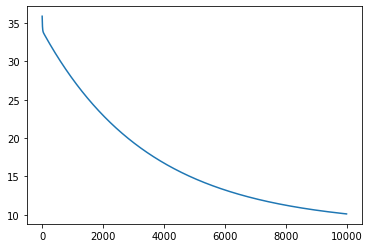

In [45]:
def AdaLine(X, y, n_iter = 10000, eta = 0.00001):
    costseq = []
    W =  random_weights(size=X.shape[1]+1)
    
    for i in range(n_iter):
        nip = net_input(X, W)    
        output = ada_activation(nip)

        W = W + eta * ada_cost_derivative(X, y, W)
        costseq.append(ada_cost(X,y, W))
        
    return W, costseq


w_trained, costs = AdaLine(Xtrain, ytrain)
plt.plot(costs)

> **Ex. 1.3.4 (BONUS):** Write a function that scales each of the variables in the dataset (including **y**) using the formula 
$$
x_j^{new} = \frac{x_j^{old} - \mu_j}{\sigma_j}
$$
> rerun the adaline function on the scaled variables.

In [46]:
# [Answer to Ex. 1.3.4 BONUS]

In [ ]:
def standardScaler(X, y):
    """ Scales the input. (Horrible code)    
    """
    X_new = X.copy()

    for i in range(X.shape[1]):
        xj = X[:,i]

        stdev = np.std(xj)
        mean = np.mean(xj)
        
        X_new[:,i] = (xj - mean)/stdev
    
    y_stdev = np.std(y)
    y_mean = np.mean(y)
    
    y_new = (y.copy() - y_mean)/y_stdev
    
    return X_new, y_new




X_scaled, y_scaled = standardScaler(Xtrain,ytrain)

w_trained, costs = AdaLine(X_scaled, y_scaled)
plt.plot(costs)